## Домашнее задание 3 (10 баллов)

## НИУ ВШЭ, 2024-25 учебный год

## Формат сдачи

Сам ноутбук называйте в формате hw-03-USERNAME.ipynb, где USERNAME — ваши фамилия и имя. Файл надо будет сдать в anytask.

## О задании

В этом домашнем задании вы получите опыт подготовки данных и EDA (Exploratory Data Analysis), приблизившись к реальной работе с данными с помощью уже знакомых вам инструментов: numpy, pandas, matplotlib и seaborn, а также познакомитесь с plotly.

EDA - важный этап работы с данными. Именно в процессе EDA вы можете выяснить особенности датасета, найти зависимости в данных, протестировать гипотезы о взаимосвязях признаков и целевой переменной. В реальности вы сами будете определять, что и как проверять в рамках EDA, однако в данной работе гипотезы будут выдвинуты за вас автором задания. Также и типы графиков, которые вы будете использовать уже предопределены за вас. Выполняя задания по визуализациям, обращайте внимание на референсные картинки, которые были оставлены авторами. Они показывают, какой примерно результат от вас ожидается.

Это задание будет включать в себя построение некоторого количества графиков, потому вот основные правила, в соответствии с которыми графики должны быть оформлены:
1. Любой график всегда имеет название.
2. Оси у графика подписаны (исключение - график делит название оси с соседним).
3. Подписи делаются на одном языке (либо английский, либо русский), но не на их смеси.
4. Если вы выводите несколько графиков, то они размещаются в рамках одного объекта matplotlib.pyplot.figure. Вы не выводите графики последовательно, а смотрите, как их разместить сразу все за раз.
5. Отдельные графики (если графиков на картинке больше 1) также имеют свои названия.
6. Если на графике есть несколько различных объектов, то для их различения используется легенда. Помещайте легенду в место, где она в наименьшей мере мешает восприятию самого графика.
7. Если есть легенда, то она должна иметь навание, а также ее содержание должно быть адекватными (пожалейте проверяющих, они не хотят разбирать, а к чему относится зеленая линия, которая на легенде помечена меткой "0").
8. Используйте цветовые гаммы, чтобы объекты на графиках отличались цветом.
9. Текст на визуализации должен быть читаем. Если вы вывели названия категорий в качестве подписей на оси Х, а эти названия наезжают друг на друга, то вам нужно что-то с этим сделать. Нечитаемый или плохо читаемый (очень маленький, невероятно огромный) текст ведет к снижению баллов.

При работе с табличными данными используйте функционал [style](https://pandas.pydata.org/docs/user_guide/style.html#Builtin-Styles), чтобы визуально выделять необходимые элементы.

В этом задании будут оцениваться ваши развернутые комментарии, размышления и выводы (по построенным графикам): не скупитесь на них, но следите, чтобы выводы не были поверхностными и очевидными.

*Тут правило про плагиат, которое вам итак известно - обнуляются все работы, которые подозреваются в некорректных заимствованиях!* Помните, что просто скопировать код из интернета и указать источник - это не ваша самостоятельная работа, а автора кода. Измените хоть что-нибудь в коде.

## О данных

Будем работать с [датасетом физической активности](https://www.kaggle.com/datasets/uciml/human-activity-recognition-with-smartphones).

В этом датасете собраны данные 30 человек, выполняющих различные действия со смартфоном на поясе. Данные записывались с помощью датчиков (акселерометра и гироскопа) в этом смартфоне. Были зафиксированы: "3-осевое линейное ускорение" (_tAcc-XYZ_) и "3-осевая угловая скорость" (_tGyro-XYZ_).

1. Все сигналы отсортированы по времени, пропущены через фильтр шума.
2. Все наблюдения были разделены на окна по 128 сигналов в каждом, причем окна пересекаются на 50% (грубо говоря, с 1 по 128 сигнал в 1 окно, с 64 до 192 сигнала - во 2 окно и так далее). То есть каждое окно покрывает 2.56 секунды данных (два шага человека при ходьбе, учитывая медленную походку пожилых людей).
3. Линейное ускорение было разделено на две составляющие (с помощью низкочастотного фильтра): ускорение самого тела, а также гравитационная составляющая. Будем называть их ускорением тела и гравитационным ускорением.
4. К получившимся окнам применяли различные функции для получения следующих показателей:
    - max
    - min
    - mad (median)
    - mean
    - std
    - skewness (коэффициент асимметричности распределения признака в окне)
    - etc. (подробнее, на сколько это возможно, указано в [самой статье](https://www.esann.org/sites/default/files/proceedings/legacy/es2013-84.pdf))
5. Величина (magnitude) сигнала также определялась через евклидову норму всех значений из вектора для одного окна.
6. К окнам было применено преобразование Фурье, чтобы получить частоты. Из частот были извелченыте же показатели, плюс новые:
    - bandsEnergy (энергия частотного интервала)
7. Были посчитаны углы между векторами соответствующих окон.
8. Для ускорений были посчитаны производные - рывки, к которым применялись те же функции.

Итог: в датасете каждый признак - это какая-то операция над вектором из 128 чисел, которые соответствуют замерам определенного человека занятого какой-то активностью на протяжении 2.56 секунд.

Как читать названия признаков? Примеры:
- `tBodyAccMag-mean()` - это вектор ускорений тела (без гравитационной составляющей этого ускорения), из которого взяли евклидову норму, а затем усреднили, чтобы получить скаляр
- `fBodyAcc-bandsEnergy()-1,8.2` - это вектор ускорения тела, к которому применили преобразование Фурье, преобразовав его в вектор частот, а затем посчитали на этом векторе энергию данного частотного интервала в определенном диапазоне частот (в данном случае 1 - 8.2)
- `angle(X,gravityMean)` - это угол между осью Х и вектором усредненных значений гравитационного ускорения из соответствующего окна

Вероятно, сначала покажется сложным, но мы разберемся с некоторыми признаками в отдельности и вы сможете понять их смысл, уже исходя из фактических соотношений.

## Предобработка данных

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

warnings.filterwarnings("ignore")
plt.style.use("seaborn-v0_8")

In [46]:
train = pd.read_csv('train.csv')
test = pd.read_csv("test.csv")

In [47]:
train.shape

(7352, 563)

In [48]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 563 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), int64(1), object(1)
memory usage: 31.6+ MB


In [49]:
train.columns

Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'fBodyBodyGyroJerkMag-kurtosis()', 'angle(tBodyAccMean,gravity)',
       'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'subject', 'Activity'],
      dtype='object', length=563)

В датасете 563 признака (что, объективно, дофига), включая целевую переменную. Столько признаков нам не нужно. Мы за вас сделали подвыборку признаков для удобства работы с ними.

In [50]:
cols_subset = [
    'tBodyAccMag-mean()',  # усредненная величина ускорения тела
    'tBodyGyroJerk-mad()-X',  # медианная величина рывка тела по оси Х
    'tGravityAcc-min()-X',  # минимум гравитационной составляющей ускорения по оси Х
    'tBodyAcc-max()-X',  # максимальная величина ускорения тела по оси Х
    'fBodyAcc-bandsEnergy()-1,8.2',  # энергия ускорения тела в интервале частоты
    'angle(X,gravityMean)',  # угол между осью Х и усредненной гравитационной составляющей ускорения
    'angle(Y,gravityMean)',  # угол между осью Y и усредненной гравитационной составляющей ускорения
    'angle(Z,gravityMean)',  # угол между осью Z и усредненной гравитационной составляющей ускорения,
    'fBodyAcc-skewness()-X',  # асимметричность частоты ускорения тела по оси Х
    'subject',  # номер испытуемого
    'Activity',  # название вида деятельности (целевая переменная)
]

In [51]:
train = train[cols_subset]
test = test[cols_subset]

### Задание 1 (0.5 балла)

Посмотрите на пропуски и дубли в данных train и test. Есть ли они? Если есть, напишите, с чем это может быть связано? Если нет, то просто напишите, что пропусков и/или дублей нет.

In [52]:
train.isna().sum()

tBodyAccMag-mean()              0
tBodyGyroJerk-mad()-X           0
tGravityAcc-min()-X             0
tBodyAcc-max()-X                0
fBodyAcc-bandsEnergy()-1,8.2    0
angle(X,gravityMean)            0
angle(Y,gravityMean)            0
angle(Z,gravityMean)            0
fBodyAcc-skewness()-X           0
subject                         0
Activity                        0
dtype: int64

In [53]:
test.isna().sum()

tBodyAccMag-mean()              0
tBodyGyroJerk-mad()-X           0
tGravityAcc-min()-X             0
tBodyAcc-max()-X                0
fBodyAcc-bandsEnergy()-1,8.2    0
angle(X,gravityMean)            0
angle(Y,gravityMean)            0
angle(Z,gravityMean)            0
fBodyAcc-skewness()-X           0
subject                         0
Activity                        0
dtype: int64

Пропусков нет нигде, что радует. 

In [54]:
train.duplicated().sum()

0

полных повторений также нет.

Можно предположить, что данные либо заранее почистили (как было указано, дата прошла 
через фильтр шума, что могло повлечь и удаление дупликатов и пустых значений)
, либо браслеты по отслеживанию активности настолько хороши, что 7352 отработали без единой неполадки (что, на самом деле, не так и много, наверное).

Сразу проверим гипотезу, что данные могли собраться стольтко раз и ни разу не
 "испортиться": записаться дважды, потеряться.

Будем считать, что данные либо успешно сохранены, либо произошла ошибка. Таким образом имеем биномиальное распрееделение. Попробуем оценить вероятность сбоя отправки данных.

Произошло биномиальное распределение. Дано $n$ и исход каждого испытания.
Оценим параметр $p$ в этом распределении с помощью 90% доверительного интервала.

То есть найдем это:

$ P(| 1 - p |) <= 0.9 $

Интервал ограничен сверху единицей, потому интервал выглядит так

$ 1 = 1 - t_{0.9} \sqrt{ \frac{w(1-w)}{n} } <= p <= 1 $

Не совсем разобравшись, но все же что-то написав, оставлю это как есть.

### Задание 2 (0.5 балла)

Выведите основные статистики данных: среднее, медиана, перцентили (0.25, 0.5, 0.75), минимум, максимум, стандартное отклонение. Посмотрите на таблицу и напишите, видите ли вы в ней что-нибудь интересное.

In [55]:
train.describe()

tBodyAccMag-mean()  tBodyGyroJerk-mad()-X  tGravityAcc-min()-X  \
count         7352.000000            7352.000000          7352.000000   
mean            -0.543884              -0.727735             0.678505   
std              0.477653               0.315832             0.508656   
min             -1.000000              -0.999889            -1.000000   
25%             -0.983282              -0.991595             0.804270   
50%             -0.883371              -0.950268             0.926693   
75%             -0.106892              -0.474625             0.965095   
max              1.000000               1.000000             1.000000   

       tBodyAcc-max()-X  fBodyAcc-bandsEnergy()-1,8.2  angle(X,gravityMean)  \
count       7352.000000                   7352.000000           7352.000000   
mean          -0.468604                     -0.847963             -0.489547   
std            0.544547                      0.233633              0.511807   
min           -1.000000                     -1.000000             -1.000000   
25%           -0.936219                     -0.999480             -0.812065   
50%           -0.881637                     -0.986582             -0.709417   
75%           -0.017129                     -0.764508             -0.509079   
max            1.000000                      1.000000              1.000000   

       angle(Y,gravityMean)  angle(Z,gravityMean)  fBodyAcc-skewness()-X  \
count           7352.000000           7352.000000            7352.000000   
mean               0.058593             -0.056515              -0.128562   
std                0.297480              0.279122               0.403686   
min               -1.000000             -1.000000              -0.931208   
25%               -0.017885             -0.143414              -0.486841   
50%                0.182071              0.003181              -0.163271   
75%                0.248353              0.107659               0.155112   
max                0.478157              1.000000               1.000000   

           subject  
count  7352.000000  
mean     17.413085  
std       8.975143  
min       1.000000  
25%       8.000000  
50%      19.000000  
75%      26.000000  
max      30.000000

In [56]:
test.describe()

tBodyAccMag-mean()  tBodyGyroJerk-mad()-X  tGravityAcc-min()-X  \
count         2947.000000            2947.000000          2947.000000   
mean            -0.559043              -0.735661             0.696878   
std              0.439539               0.282074             0.502873   
min             -0.998936              -1.000000            -0.756774   
25%             -0.978433              -0.989078             0.836787   
50%             -0.861830              -0.914698             0.934930   
75%             -0.149596              -0.486423             0.970871   
max              0.479547               0.117606             0.996148   

       tBodyAcc-max()-X  fBodyAcc-bandsEnergy()-1,8.2  angle(X,gravityMean)  \
count       2947.000000                   2947.000000           2947.000000   
mean          -0.462063                     -0.880361             -0.513923   
std            0.523916                      0.160496              0.509205   
min           -0.952357                     -0.999989             -0.984195   
25%           -0.934447                     -0.999330             -0.829722   
50%           -0.852659                     -0.979336             -0.729648   
75%           -0.009965                     -0.799113             -0.545939   
max            0.786436                      0.048730              0.833180   

       angle(Y,gravityMean)  angle(Z,gravityMean)  fBodyAcc-skewness()-X  \
count           2947.000000           2947.000000            2947.000000   
mean               0.074886             -0.048720              -0.154042   
std                0.324300              0.241467               0.392203   
min               -0.913704             -0.949228              -1.000000   
25%                0.022140             -0.098485              -0.497070   
50%                0.181563             -0.010671              -0.202050   
75%                0.260252              0.092373               0.140254   
max                1.000000              0.973113               0.960367   

           subject  
count  2947.000000  
mean     12.986427  
std       6.950984  
min       2.000000  
25%       9.000000  
50%      12.000000  
75%      18.000000  
max      24.000000

прекрасные числа, которые, пока, мало что полезного говорят 

### Задание 3 (0.5 балла)

Данные сбалансированы? У вас есть 6 категорий активности (целевая переменная). Если одна из категорий представлена большим количеством наблюдений, а остальные - нет, то это обстоятельство, о котором хотелось бы знать заранее. Гиперболизированный пример: представьте, что у вас 1000 наблюдений, разделенных на два класса, и только 5 принадлежат ко второму классу. Как учить модель на такой выборке? Есть сильное подозрение, что многие модели будут склонны вырождаться в константу. Отсюда и необходимость проверять баланс классов.

Выведите количество наблюдений для всех категорий активности в train и test. Посчитайте разницу в процентах между самой крупной категорией и самой маленькой (самая большая категория - это 100%). Если разница (округленная до ближайшего целого числа) не превышает 30%, то давайте для наших целей считать, что данные сбалансированы. Напишите, сбалансированы ли данные в train и test.

попытаемся отвтеить на, наверное, очевидный вопрос: кто такой "категория активности".

находим подпись целевой переменной в комментраии столбцов на анализ

In [57]:
activity_counts = test["Activity"].value_counts() + train["Activity"].value_counts()
total = test.shape[0] + train.shape[0]
activ_partial_counts = counts / total

max_activ_p_counts = activ_partial_counts.max()
min_activ_p_counts = activ_partial_counts.min()

(max_activ_p_counts - min_activ_p_counts) / max_activ_p_counts


0.2767489711934156

In [58]:
[x for x in test["Activity"].unique()]

['STANDING',
 'SITTING',
 'LAYING',
 'WALKING',
 'WALKING_DOWNSTAIRS',
 'WALKING_UPSTAIRS']

фух, ~~чуть не взял оскар~~, все в норме

### Задание 4 (0.5 балла)

Посчитайте корреляции всех признаков (включая таргет) со всеми другими. Какими получились значения? Есть идеи, почему так? Напишите ваши мысли.

In [60]:
activities = test["Activity"].unique()
for df in [train, test]:
    for activ in activities:
        prop_name = f"IS_{activ}"
        df[prop_name] = (df["Activity"] == activ)

df = pd.concat([test, train])

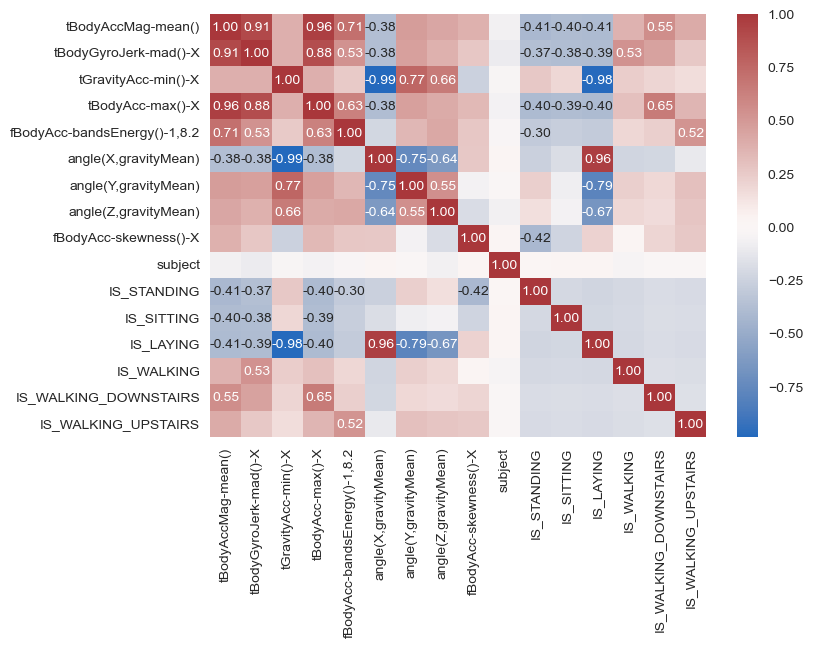

In [62]:
ax = sns.heatmap(df.corr(numeric_only=True), cmap="vlag", annot=True, fmt="0.2f")
for t in ax.texts:
    if float(t.get_text()) >= 0.5 or float(t.get_text()) <= -0.3:
        t.set_text(t.get_text())
    else:
        t.set_text("")

Поздравляем! Вы предобработали данные для максимально комфортного их последующего анализа. Теперь вы готовы приступить к Exploratory Data Analysis!

## Exploratory Data Analysis

### Задание 5 (0.5 балла)

Вы проверили основную информацию о данных и составили свое первое впечатление о них. Теперь визуализации.

Начнем рисовать графики с небольшой разминки. Выберите две любые математические функции (отличные от линейной) и нарисуйте их на одном графике. Подпишите каждый из графиков, чтобы было понятно, какие функции вы выбрали. Ниже будет пример.

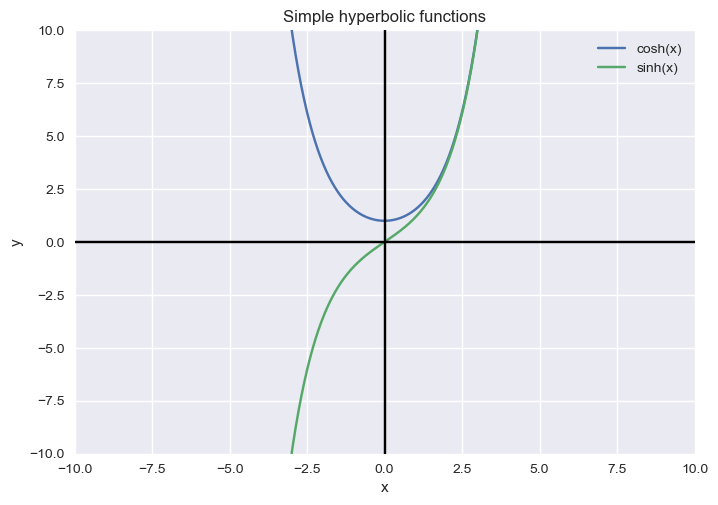

In [80]:
frames = 1000
l_border, r_border = -10, 10

plt.ylim(l_border, r_border)
plt.xlim(l_border, r_border)

x = np.linspace(-5, 5, frames)
ch = np.cosh(x)
sh = np.sinh(x)

plt.plot(x, ch, label="cosh(x)")
plt.plot(x, sh, label="sinh(x)")

plt.axvline(0, c="k")
plt.axhline(0, c="k")

plt.title("Simple hyperbolic functions")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()


### Задание 6 (0.5 балла)

Ранее мы уже проверили сбалансированность данных по разным категориям активностей в train и test сетах. Теперь визуализируйте количество сэмплов в каждой из категорий отдельно для train и test сетов, как в примере ниже. Проследите, чтобы порядок категорий слева и справа был одинаков. Иначе не очень удобно их сравнивать (когда они в разных местах двух графиков). Также заметьте, что в примере ось Х в одинаковом масштабе, что тоже удобно для сравнения.

Вам может пригодиться:
- plt.barh или ax.barh

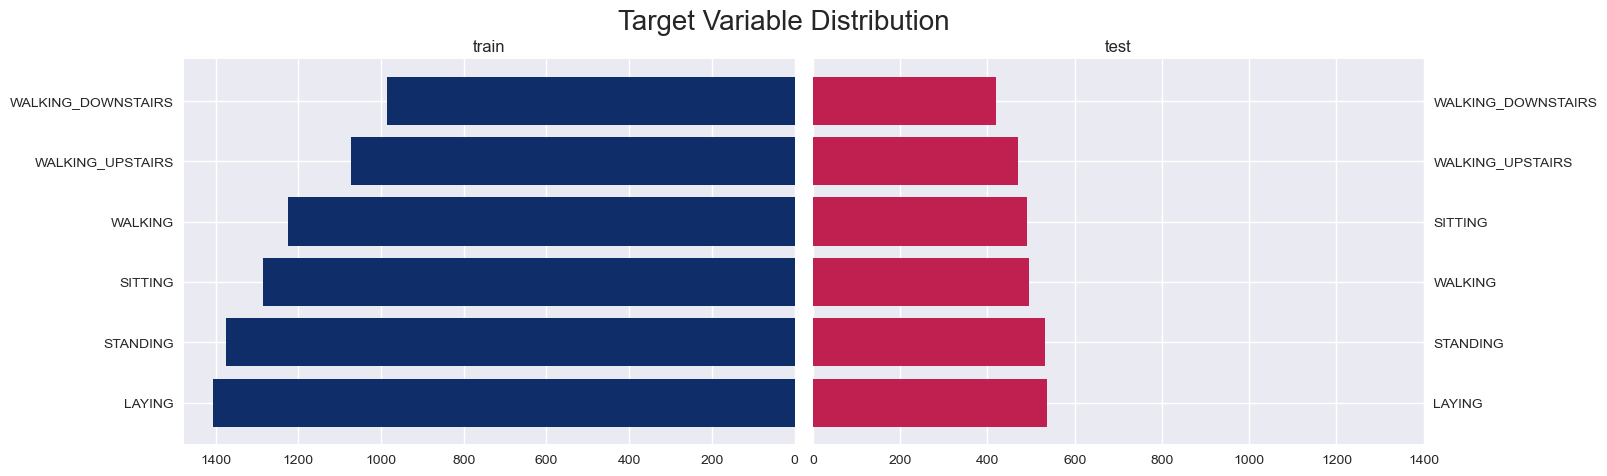

In [153]:
tr_act_vc = train["Activity"].value_counts()
tst_act_vc = test["Activity"].value_counts()
HSE_BLUE = "#0F2D69"
GSB_RED = "#BF2050"

width_max = np.max([tr_act_vc.max(), tst_act_vc.max()])
bar_height = 0.8

f, axs = plt.subplots(1, 2, figsize=(16, 5), width_ratios=[1, 1])
f.subplots_adjust(wspace=0.03)

f.suptitle("Target Variable Distribution", fontsize=20 )


axs[0].barh(
    tr_act_vc.index,
    tr_act_vc,
    bar_height,
    color=HSE_BLUE,
    data=train,
)
axs[0].set_title("train")
axs[0].invert_xaxis()
axs[0].set_xticks(np.arange(0, 1.1 * width_max, 200))


axs[1].barh(
    tst_act_vc.index,
    tst_act_vc,
    bar_height,
    color=GSB_RED,
    data=test,
)
axs[1].yaxis.set_label_position("right")
axs[1].yaxis.tick_right()
axs[1].set_title("test")
axs[1].set_xticks(np.arange(0, 1.1 * width_max, 200))

f.show()


Правда на таких графиках проще проверять баланс классов таргета?)

### Задание 7 (0.5 балла)

Ранее вы выводили таблицу корреляций. Однако просто таблица корреляций не очень удобна для анализа. Что, если признаков было бы больше? Визуализируйте heatmap корреляций. Подпишите значения корреляций, округленные до 2 знаков после запятой, на графике и оставьте только те значения, которые по модулю не меньше 0.5. Будем считать такие корреляции существенными. Если будете брать код из семинарского ноутбука, то поменяйте в нем что-нибудь, например, цветовую гамму, иначе проверяющий будет карать :)

Какой признак стоит исключить из рассмотрения корреляций? Напишите его название, а также причину, почему нет смысла его рассматривать.

Вам может пригодиться:
- sns.heatmap
- методы get_text и set_text у атрибута texts графика

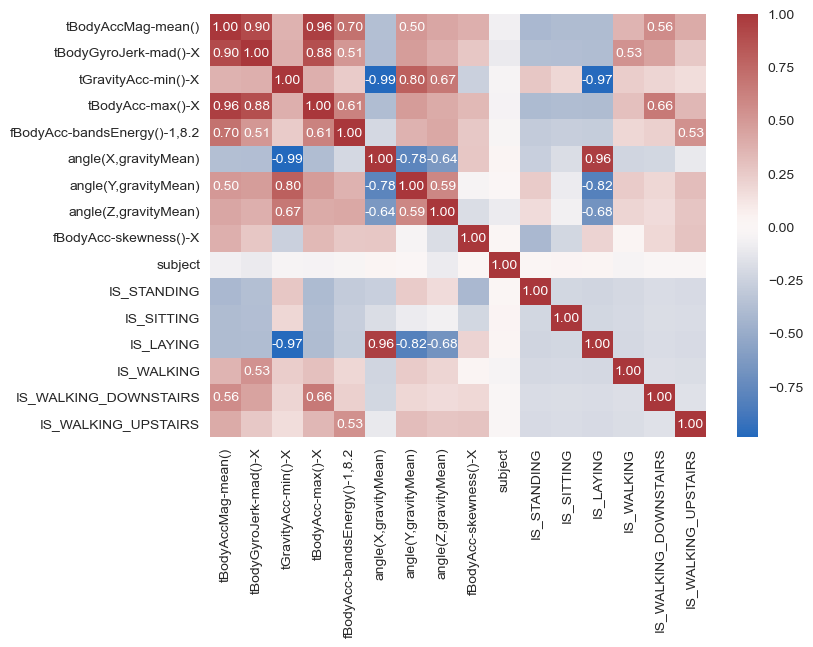

In [162]:
ax = sns.heatmap(train.corr(numeric_only=True), cmap="vlag", annot=True, fmt="0.2f")
for t in ax.texts:
    if abs(float(t.get_text())) >= 0.5:
        t.set_text(t.get_text())
    else:
        t.set_text("")

Получается такая Жорданова матрица (Прошу не пинать если она не Жорданова!)
А еще без `numeric_only=True` `df.corr` не работает. Можете объяснить, почему на семинарах это работает, а локально - нет.

### Задание 8 (0.5 балла)

Для начала будем стрелять из пушки по воробьям. Выведите pairplot по всем данным train сета. Напишите, заметили ли вы в нем что-нибудь интересное, чего не было в таблицах и графиках ранее, а также сообщите, было ли вам удобно анализировать 100 графиков.

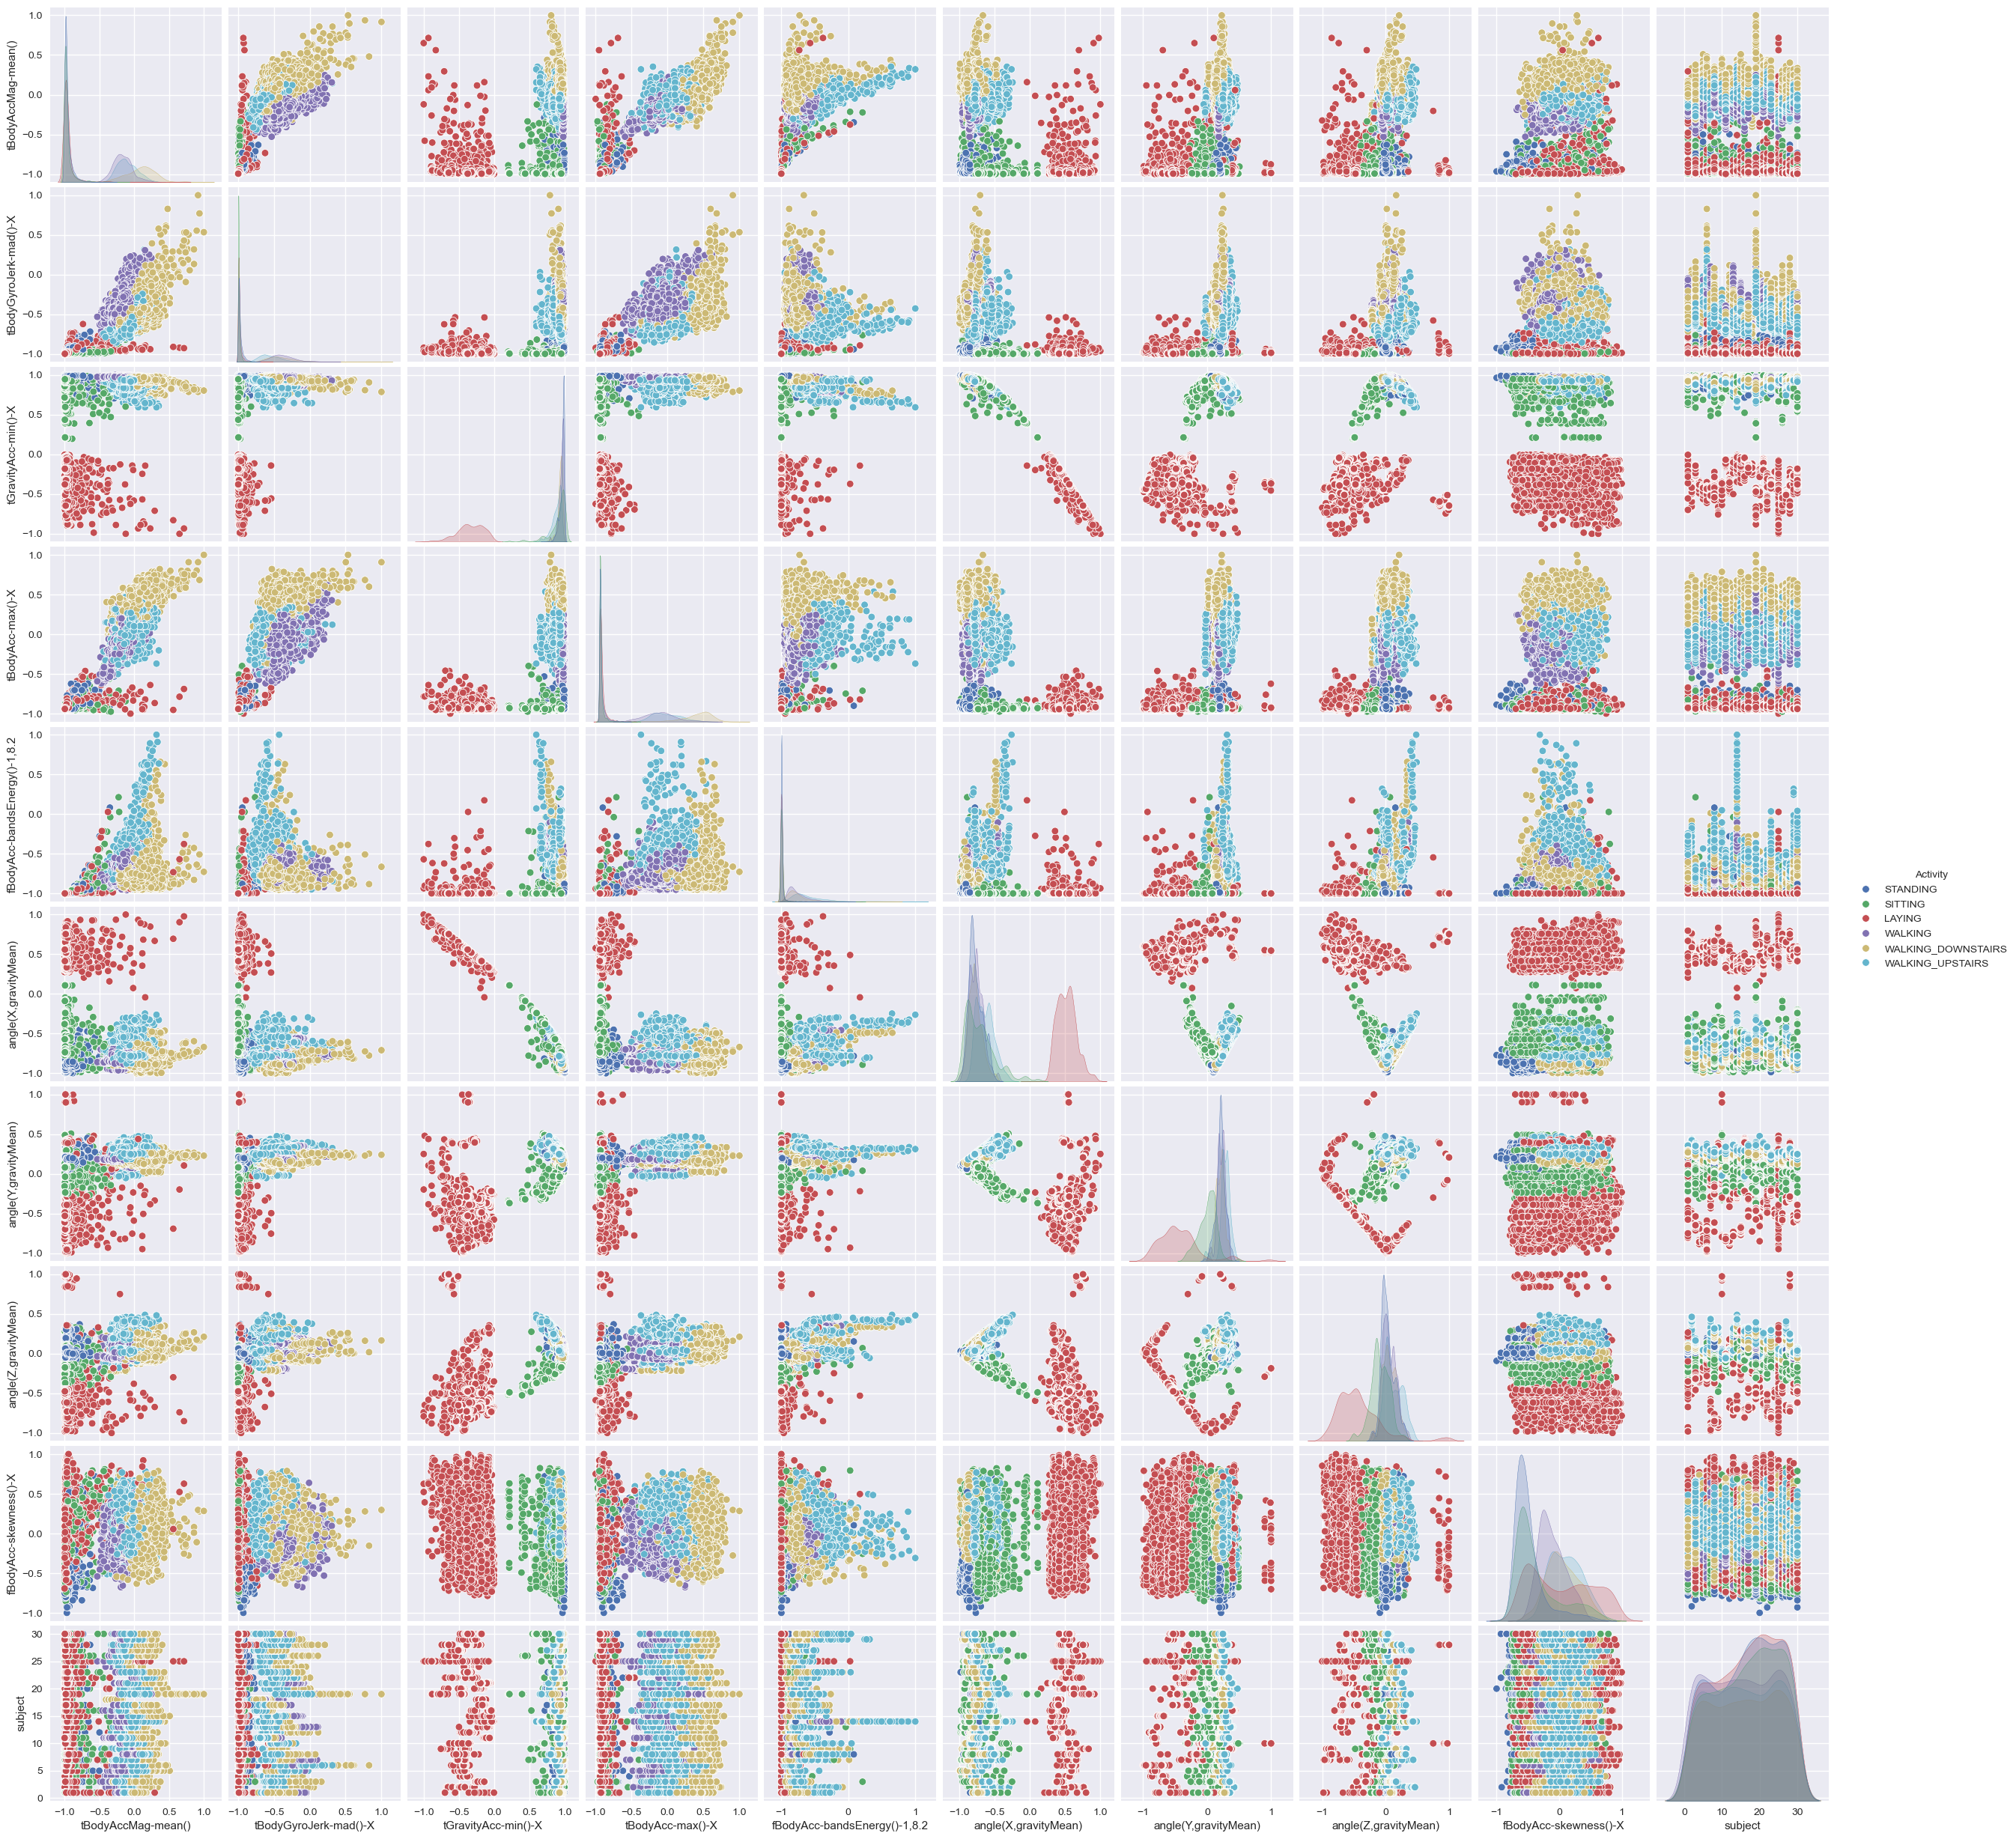

In [161]:
sns.pairplot(df[cols_subset], hue="Activity", );

Где-то можно выделить отчетливые компоненты, (`angleY` `angleX`)

Где-то видна почти линейная зависимость (`TGravity-min`, `angleX`)

Где-то видны смешения линейной зависимости и отдельного "облачка" (`angleZ`, `angleY`)

Где-то просто летает рой пчел.

Но видно, что род деятельности сильно вляет на облачка и их форму. Так красные облачка во многих случаях сильно отделены от облачков других цветов.

### Задание 9 (1 балл)

Окей. Смотреть на все сразу не очень удобно. Кажется, нужно смотреть на признаки в отдельности и искать в них инсайты.

Попробуем проверить гипотезу. Отобразите плотность распределения (kde) `tBodyAccMag-mean()` для каждой из активностей, как в примере ниже. Видите закономерность? Можно ли поделить все активности на две группы? Если да, то проведите вертикальную линию, которая визуально неплохо разделяет эти группы.

Давайте первую группу называть статическими активностями, а вторую - динамическими.

Посчитайте, какую долю правильных ответов дает ваша вертикальная линия для разделения именно этих двух групп. С чем может быть связан полученный вами результат? Предположите логическое обоснование (почему именно данный признак так хорошо/плохо разделяет группы активностей).

Вам может пригодиться:
- sns.kdeplot

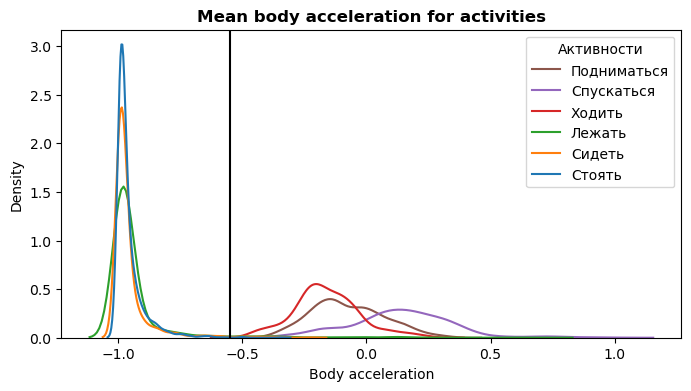

In [ ]:
# ʅ(◔౪◔ ) ʃ your code here

### Задание 10 (0.5 балла)

Поздравляем, вы проверили первую гипотезу в процессе EDA. Однако нам бы хотелось уметь не группы разделять, а каждый отдельный вид активности. Попробуйте нарисовать "ящики с усами" для `angle(X,gravityMean)` с разделением по разным видам активности на данных train. Можно ли сделать какой-то вывод по полученной визуализации? Проанализируйте и проинтерпретируйте полученные картинки (если заметили какую-то особенность, может какая-то категория значительно выделяется, то предположите, почему так могло произойти).

Вам может пригодиться:
- sns.boxplot

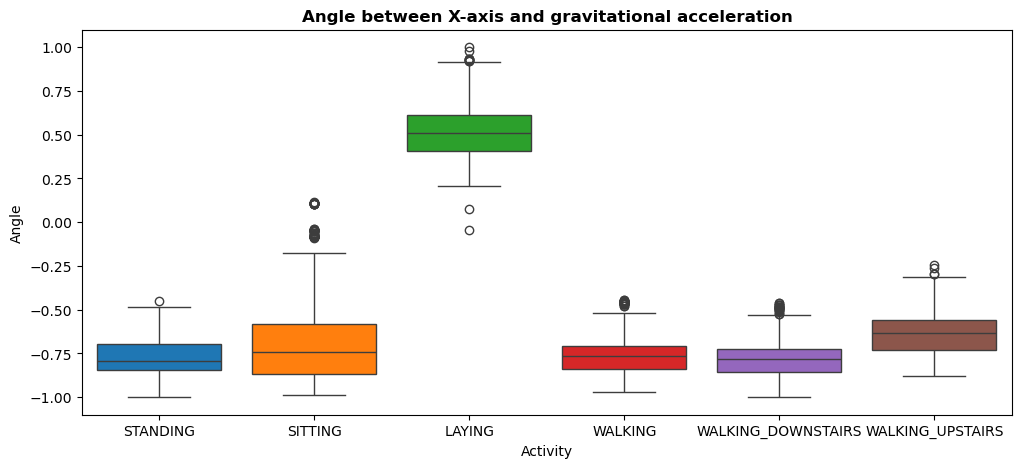

In [ ]:
# ^⨀ᴥ⨀^ your code here

### Задание 11 (0.5 балла)

Посмотрим теперь на `tBodyAcc-max()-X`. Визуализируйте скрипичные диаграммы для этого признака с разделением по активностям на всем train. Кажется логичным, что максимальное ускорение в моменте для разных активностей будет различаться. Однако есть ли активность, которая будет выделяться? Если да, то предложите объяснение, почему эта активность выделяется.

Вам может пригодиться:
- sns.violinplot

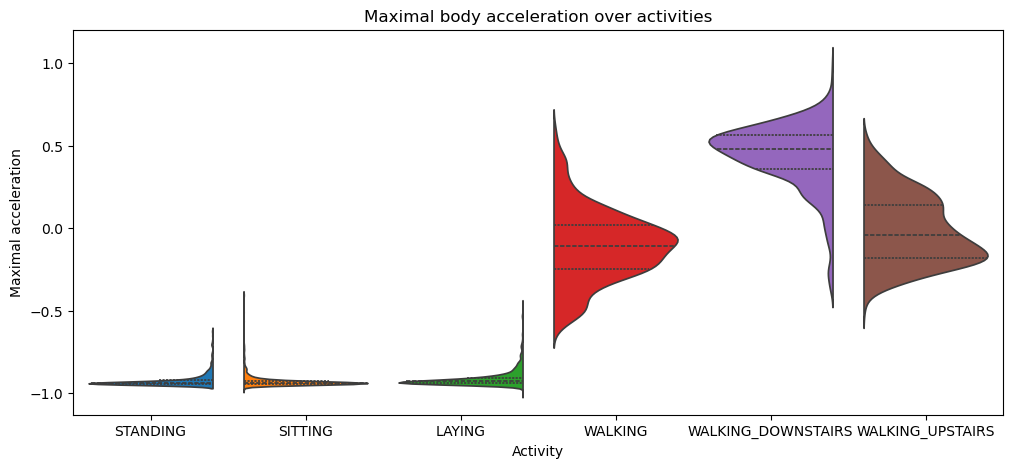

In [ ]:
# ( ͡☉ ͜ʖ ͡☉) your code here

### Задание 12 (1 балл)

Вы уже можете с довольно хорошим качеством выделить две категории активности из шести. Продолжим.

Ранее уже упоминалось разделение на две группы активностей: статические и динамические. Пришла пора разделить датасет train на две части. Сделайте это! Теперь на одной картинке покажите распределения `fBodyAcc-bandsEnergy()-1,8.2` для динамичных активностей (`boxenplot` - немного измененый "ящик с усами") и `angle(Y,gravityMean)` для статических - тут хватит и простой гистограммы (прямо, как в примере ниже). Можно ли выделить еще какие-то активности? Если да, напишите, какие активности на 1 и 2 графиках выделяются.

Вам может пригодиться:
- plt.subplots или matplotlib.gridspec (заметили, что один график больше другого? попробуйте сами так сделать - вам понравится...)
- sns.boxenplot
- sns.histplot

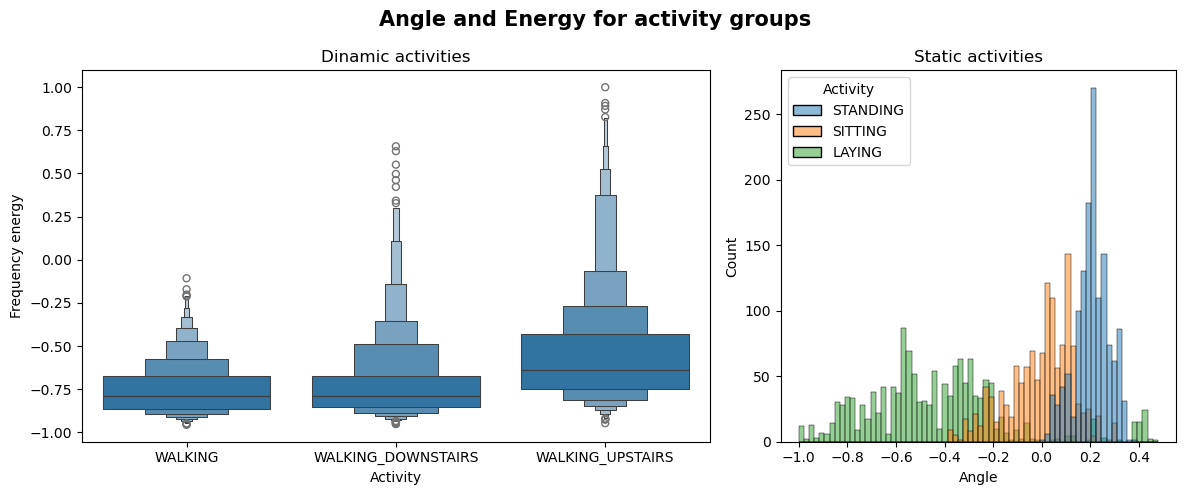

In [ ]:
# ‿( ́ ̵ _-`)‿ your code here

### Задание 13 (0.5 балла)

Не всегда жизнь будет такой легкой, а данные будут полностью или почти линейно разделимы в одному признаку (иначе чем бы занимались дата саентисты...). Часто данные вообще ни по одному признаку нельзя адекватно разделить (да и по комбинациям признаков тоже). Давайте попробуем взять не один признак, а целых два!

Рассмотрим только статические активности. Будет снова два графика сразу. На первом графике будет боксплот распределения `fBodyAcc-skewness()-X` по активностям. А на втором попробуем взять не все наблюдения данной группы активностей, а только их часть. Разделимы ли категории по `fBodyAcc-skewness()-X`? А если взять только те строки, где `fBodyAcc-skewness()-X < -0.376`, и теперь вывести боксплот распределения `angle(Y,gravityMean)` по разным активностям? Попробуйте и напишите, выделилась ли какая-то категория?

Вам может пригодиться:
- plt.subplots или matplotlib.gridspec
- sns.boxplot

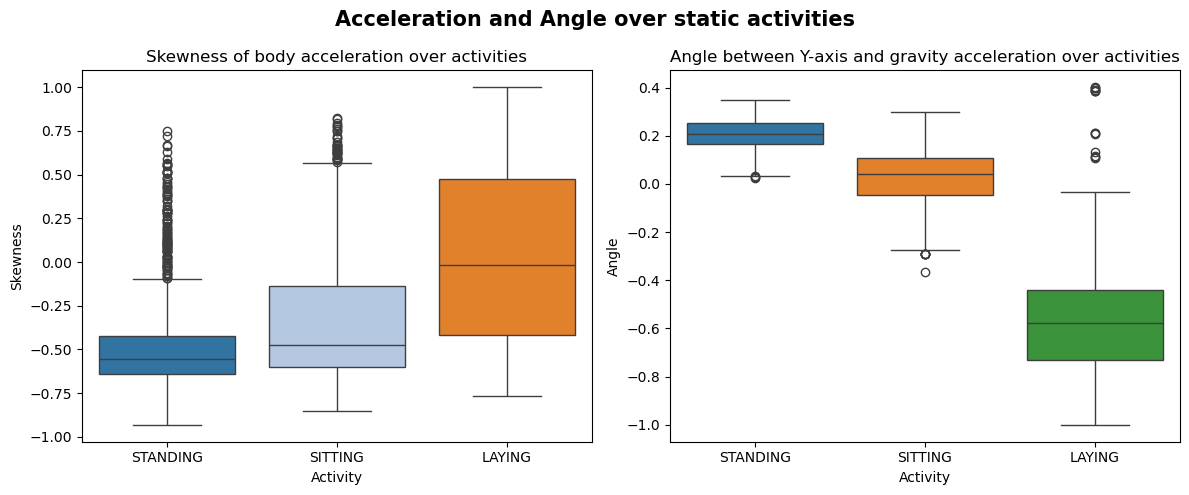

In [ ]:
# (ಠ_ಠ) your code here

Поздравляем, теперь вы на шажок ближе к тому, чтобы стать решающим деревом!

### Задание 14 (1 балл)

Вот и осталась лишь одна активность, которую мы никак не выделили. Попробуем и ее какими-то порогами отделить от всех остальных. Да, можно было бы сказать, что, раз уж мы выделили 5 из 6 категорий, то все остальное - это и есть последняя категория, но мы не идем легкими путями. Выделить оставшуюсь категорию с хорошим качеством не так уж и просто. Из доступных признаков, сначала посмотрите на распределение `tBodyAcc-max()-X` на динамических активностях (скрипичная диаграмма отлично подойдет).

А теперь спускаем вам порог `tBodyAcc-max()-X < 0.157`. Для таких строк постройте диаграмму рассеяния для признака `tGravityAcc-min()-X`. Да, получается неидеально, но это честная работа. Можно выбрать порог так, чтобы чисто из таблицы с динамическими активностями из строк, где `tBodyAcc-max()-X < 0.157`, выбрать по некоторому порогу для `tGravityAcc-min()-X` строки так, чтобы доля правильных ответов на оставшейся категории была не меньше 83%!

Вам может пригодиться:
- plt.subplots или matplotlib.gridspec
- sns.violinplot
- sns.swarmplot (иногда лучше подходит, чем просто sns.scatterplot)

Обратите внимание, что подписи к осям можно убирать методами plt. Например, если у вас общее название для оси Y для обоих графиков, то можно не подписывать ось Y у второго графика.

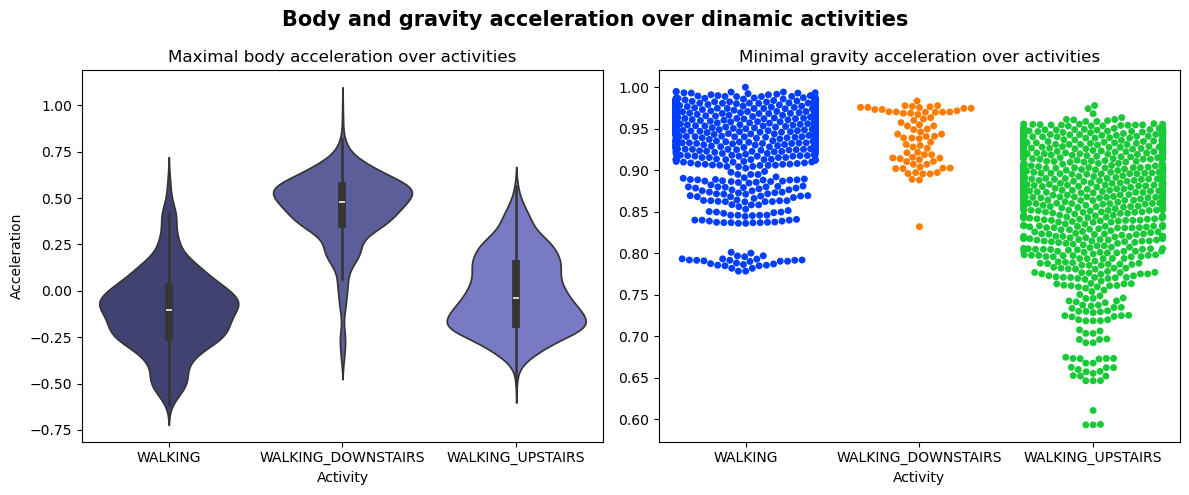

In [ ]:
# (✖╭╮✖) your code here

### Задание 15 (0.5 балла)

Теперь попробуем более интерактивные графики. Установите библиотеку `plotly` (обычно `pip install plotly` или `conda install plotly`). Синтаксис очень похож на `seaborn`, но вот [документация для plotly.express](https://plotly.com/python-api-reference/plotly.express.html).

Сначала подготовим данные для визуализации. Будем считать t-SNE просто "черным ящиком", который принимает наши данные и проецирует их в двумерное или трехмерное пространство. Возможно, придется немного подождать.

In [ ]:
%%time
from sklearn.manifold import TSNE
tsne = TSNE(random_state=666, n_components=2)
new = tsne.fit_transform(train.drop(['subject', 'Activity'], axis=1))
df_2_comp = pd.concat([
    pd.DataFrame(new, columns=['x', 'y']),
    train['Activity']
], axis=1)

tsne = TSNE(random_state=666, n_components=3)
new = tsne.fit_transform(train.drop(['subject', 'Activity'], axis=1))
df_3_comp = pd.concat([
    pd.DataFrame(new, columns=['x', 'y', 'z']),
    train['Activity']
], axis=1)

CPU times: total: 15min 41s
Wall time: 58.2 s


Теперь нарисуйте scatter-график через `plotly.express` для `df_2_comp` с выделением цветами активностей. Красиво получилось? Видны скопления точек одного цвета? Можно разные активности отделить линиями на данном графике?

In [ ]:
# ʅ(◔౪◔ ) ʃ your code here

Мы не отстаем от трендов и тоже можем в 3D. Сейчас и вы научитесь (если еще не умеете). Нарисуйте scatter_3d-график через `plotly.express` для `df_3_comp` с выделением цветами активностей. Повращайте его. Нормально получилось? Есть ли какая-то структура у точек?

In [ ]:
# (✧≖‿ゝ≖) your code here

### Задание 16 (1 балл)

Мы сделали вам fit. Ваша очередь сделать predict. Допишите функцию, которая принимает на вход датафрейм с признаками, а выдает вектор из предсказаний - для каждой строки датафрейма вы определяете, к какому классу принадлежит объект. Рекомендуем сразу записывать из строками, а не кодировать в числа. Дальше фукнция `accuracy_score` выдаст вам долю правильных ответов.

Подсказка: вы уже отделили категории друг от друга по каким-то признакам. Воспользуйтесь этим знанием! Используя только проведенный вами анализ можно спокойно выбить не менее 75% на train и test! Если вы получите меньше 75%, то балл будет снижен. Авторское решение (на основе всех графиков выше) выбивает 81% и 77% на train и test соответственно. [Шпаргалка с готовыми идеями для такой задачи](https://rutube.ru/video/f884aa6ed5f94120b7304506042fe5bb/)

In [ ]:
def predict(df: pd.DataFrame):
    # ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ your code here
    pass

def accuracy_score(y_true, y_pred) -> float:
    y_true = np.asarray(y_true).reshape(-1, 1)
    y_pred = np.asarray(y_pred).reshape(-1, 1)
    return (y_true == y_pred).mean()

In [ ]:
train_preds = predict(train)
test_preds = predict(test)
print(f"Accuracy on train set => {accuracy_score(train['Activity'], train_preds)}")
print(f"Accuracy on test set => {accuracy_score(test['Activity'], test_preds)}")

Accuracy on train set => 0.8109357997823722
Accuracy on test set => 0.7757041058703766


__Место для мема и/или фидбэка__

> тут